# **معادله‌ی پخش**

معادله‌ی پخش در دو بعد به صورت زیر تعریف می‌شود:

$$
\frac{\partial u(x, y, t)}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

که در آن:
- $ u(x, y, t) $: غلظت ماده در موقعیت $ (x, y) $ و زمان $ t $.
- $ D $: ضریب پخش.

## حل تحلیلی معادله‌ی پخش
حل تحلیلی معادله‌ی پخش در دو بعد به صورت زیر است:

   $$
   u(x, y, t) = \frac{1}{4\pi D t} \exp\left( -\frac{x^2 + y^2}{4 D t} \right)
   $$


---
# **ولگشت دو بعدی و ارتباط آن با معادله‌ی پخش**

ولگشت دو بعدی مدلی است که حرکت تصادفی ذرات را توصیف می‌کند. در هر قدم، ذره به صورت تصادفی در یکی از چهار جهت (بالا، پایین، چپ، راست) حرکت می‌کند. اگر تعداد ذرات زیاد باشد، توزیع موقعیت آن‌ها با معادله‌ی پخش توصیف می‌شود.

---


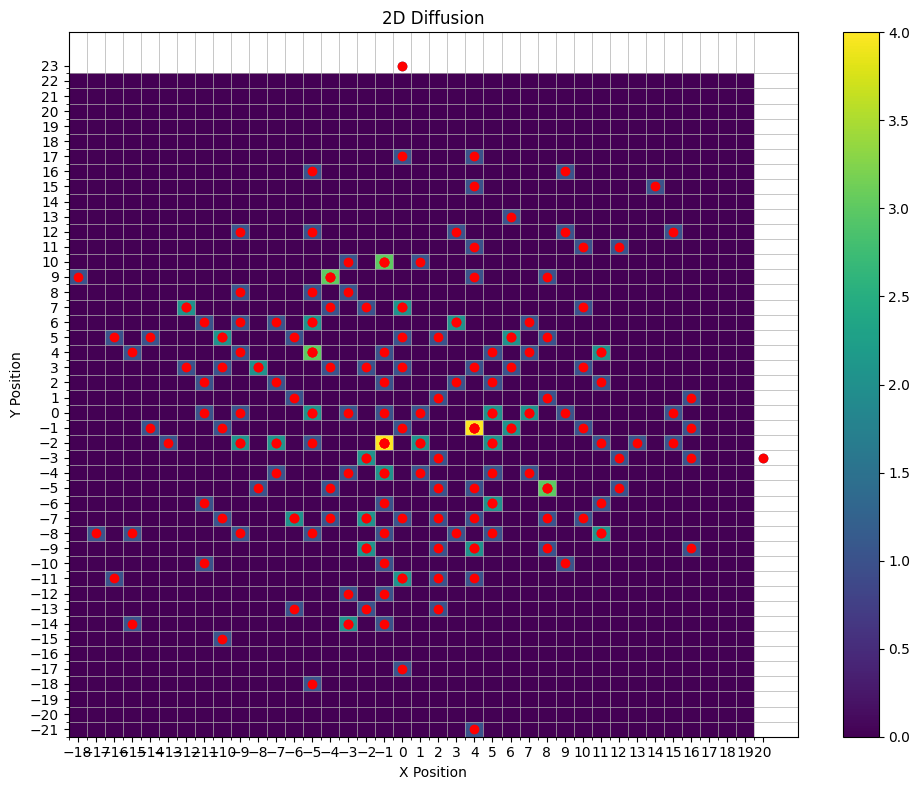

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import random

M = 100
N = 200
r = 1

def produce1randomWalker(M, r):

    random_steps = np.random.randint(1, 3, size = M)         # to define up/down or right/left : number 1 for right/left and number 2 for up/down
    x_steps = [0]                       # initial position at (0, 0)
    y_steps = [0]

    for i in range(M):
        if random_steps[i] == 1:
            if random.random() > 0.5:
                x_steps.append(r)           # positive x
            else:
                x_steps.append(-1*r)        # negative x
        else:
            if random.random() > 0.5:
                y_steps.append(r)           # positive y
            else:
                y_steps.append(-1*r)        # negative y

    x_position = np.sum(x_steps)        # last position
    y_position = np.sum(y_steps)

    return x_position, y_position

fig, ax1 = plt.subplots(figsize = (10, 8))

all_x = []
all_y = []

for i in range(N):
    x, y = produce1randomWalker(M - 1, r)
    if i%10 == 0 :
        ax1.plot(x, y, color=plt.cm.hsv(i * 20 % 255), alpha=0.6)
    all_x.append(x)
    all_y.append(y)


x = np.arange(np.floor(np.min(all_x)) - 0.5, np.ceil(np.max(all_x)) + 0.5, 1)
y = np.arange(np.floor(np.min(all_y)) - 0.5, np.ceil(np.max(all_y)) + 0.5, 1)

counts, x_edges, y_edges = np.histogram2d(all_x, all_y, bins = [x, y])

ax1.scatter(all_x, all_y)
ax1.xaxis.set_minor_locator(FixedLocator(x))
ax1.yaxis.set_minor_locator(FixedLocator(y))
ax1.set_xticks(np.arange(np.floor(np.min(all_x)), np.ceil(np.max(all_x)) + 1, 1))
ax1.set_yticks(np.arange(np.floor(np.min(all_y)), np.ceil(np.max(all_y)) + 1, 1))
ax1.grid(which='minor', linestyle='-', linewidth=0.5)

ax1.set_title("2D Diffusion")
ax1.set_xlabel("X Position")
ax1.set_ylabel("Y Position")
plt.pcolormesh(x, y, counts.T)
plt.plot(all_x, all_y, 'ro')
plt.colorbar()
plt.tight_layout()
plt.show()

در این بخش می‌خواهیم احتمال انتخاب جهت بالا را افزایش دهیم

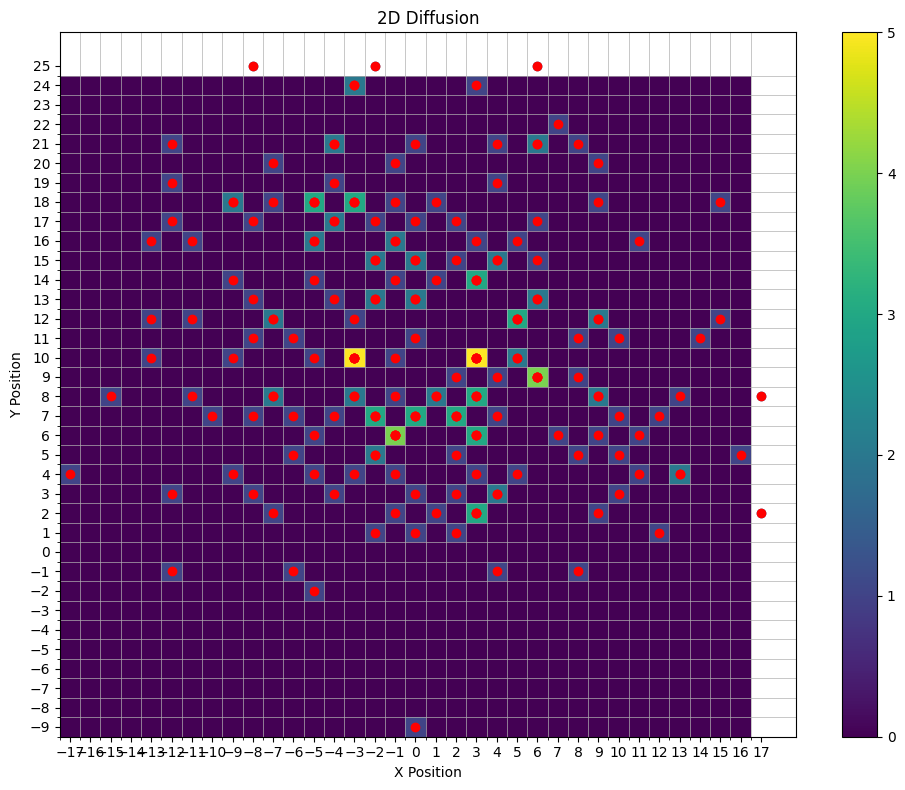

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import random

M = 100
N = 200
r = 1

def produce1randomWalker(M, r):

    random_steps = np.random.randint(1, 3, size = M)        # to define up/down or right/left : number 1 for right/left and number 2 for up/down
    x_steps = [0]                       # initial position at (0, 0)
    y_steps = [0]

    for i in range(M):
        if random_steps[i] == 1:
            if random.random() > 0.5:
                x_steps.append(r)           # positive x
            else:
                x_steps.append(-1*r)        # negative x
        else:
            if random.random() > 0.4 :
                y_steps.append(r)           # positive y
            else:
                y_steps.append(-1*r)        # negative y
                 
    x_position = np.sum(x_steps)        # last position
    y_position = np.sum(y_steps)

    return x_position, y_position


fig, ax1 = plt.subplots(figsize = (10, 8))

all_x = []
all_y = []

for i in range(N):
    x, y = produce1randomWalker(M - 1, r)
    if i%10 == 0 :
        ax1.plot(x, y, color=plt.cm.hsv(i * 20 % 255), alpha=0.6)
    all_x.append(x)
    all_y.append(y)


x = np.arange(np.floor(np.min(all_x)) - 0.5, np.ceil(np.max(all_x)) + 0.5, 1)
y = np.arange(np.floor(np.min(all_y)) - 0.5, np.ceil(np.max(all_y)) + 0.5, 1)

counts, x_edges, y_edges = np.histogram2d(all_x, all_y, bins = [x, y])

ax1.scatter(all_x, all_y)
ax1.xaxis.set_minor_locator(FixedLocator(x))
ax1.yaxis.set_minor_locator(FixedLocator(y))
ax1.set_xticks(np.arange(np.floor(np.min(all_x)), np.ceil(np.max(all_x)) + 1, 1))
ax1.set_yticks(np.arange(np.floor(np.min(all_y)), np.ceil(np.max(all_y)) + 1, 1))
ax1.grid(which='minor', linestyle='-', linewidth=0.5)
ax1.set_title("2D Diffusion")
ax1.set_xlabel("X Position")
ax1.set_ylabel("Y Position")
plt.pcolormesh(x, y, counts.T)
plt.plot(all_x, all_y, 'ro')
plt.colorbar()
plt.tight_layout()
plt.show()

# **مقایسه با حل تحلیلی معادله‌ی پخش**
توزیع ذرات حاصل از شبیه‌سازی را با حل تحلیلی مقایسه کنیم.

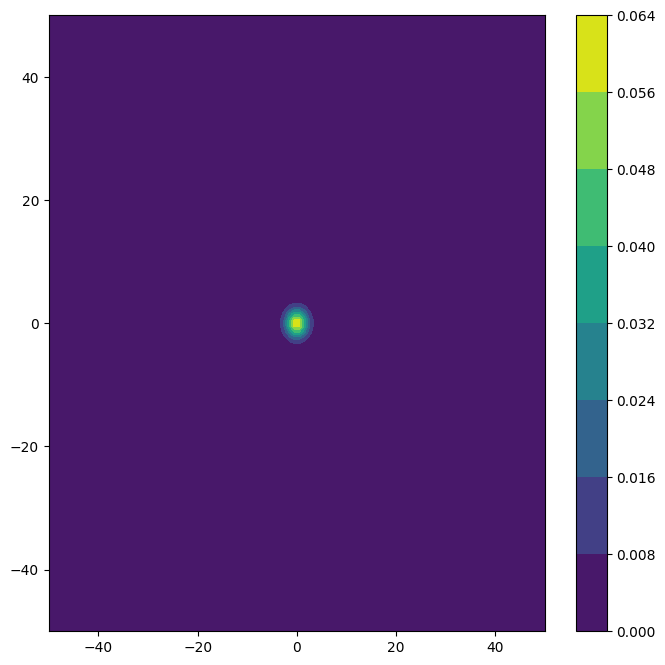

In [15]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.25
t = 5
nx, ny = 100, 100

x_min, x_max = -50, 50
y_min, y_max = -50, 50

x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)

X, Y = np.meshgrid(x, y)

u = (1 / (4*np.pi*D*t)) * np.exp(-(X**2 + Y**2) / (4*D*t))

plt.figure(figsize = (8, 8))
contour = plt.contourf(X, Y, u)
plt.colorbar(contour)
plt.show()

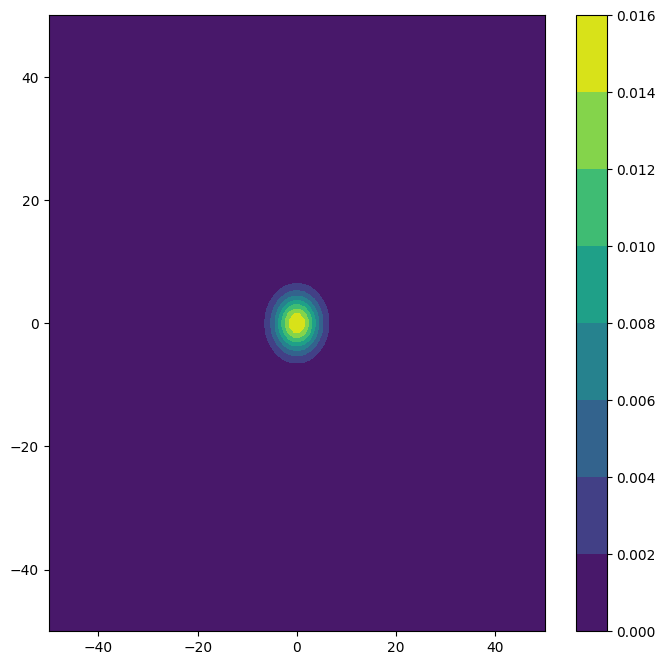

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.25
t = 20
nx, ny = 100, 100

x_min, x_max = -50, 50
y_min, y_max = -50, 50

x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)

X, Y = np.meshgrid(x, y)

u = (1 / (4*np.pi*D*t)) * np.exp(-(X**2 + Y**2) / (4*D*t))

plt.figure(figsize = (8, 8))
contour = plt.contourf(X, Y, u)
plt.colorbar(contour)
plt.show()

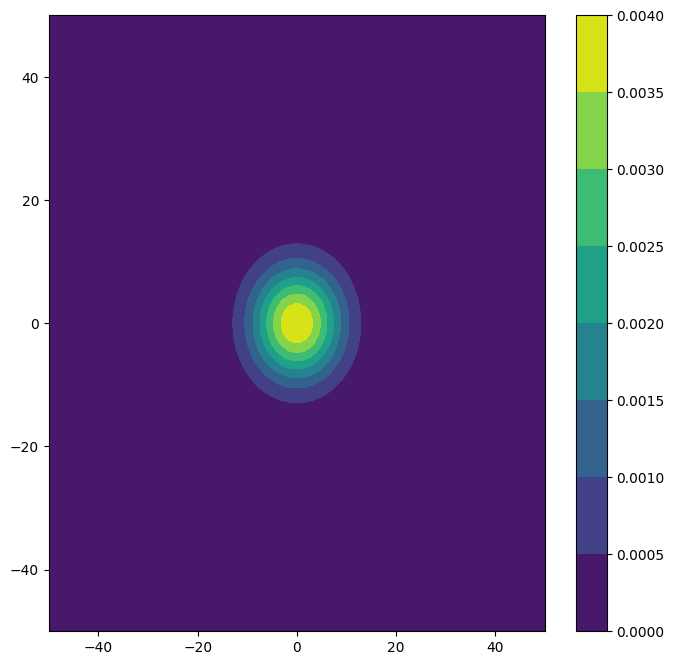

In [2]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.25
t = 80
nx, ny = 100, 100

x_min, x_max = -50, 50
y_min, y_max = -50, 50

x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)

X, Y = np.meshgrid(x, y)

u = (1 / (4*np.pi*D*t)) * np.exp(-(X**2 + Y**2) / (4*D*t))

plt.figure(figsize = (8, 8))
contour = plt.contourf(X, Y, u)
plt.colorbar(contour)
plt.show()

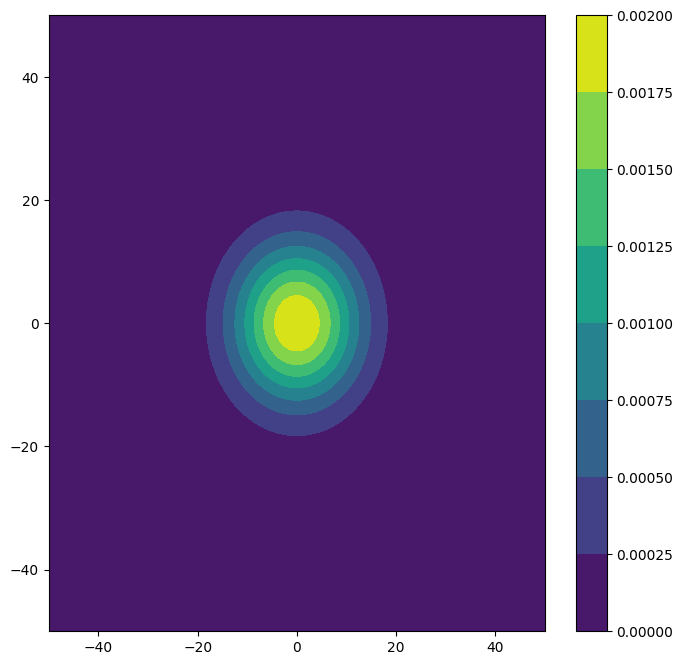

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.25
t = 160
nx, ny = 100, 100

x_min, x_max = -50, 50
y_min, y_max = -50, 50

x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)

X, Y = np.meshgrid(x, y)

u = (1 / (4*np.pi*D*t)) * np.exp(-(X**2 + Y**2) / (4*D*t))

plt.figure(figsize = (8, 8))
contour = plt.contourf(X, Y, u)
plt.colorbar(contour)
plt.show()